# Clean and Analyze Employee Exit Surveys

In this project, We'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

And we'll play the role of data analyst and pretend our stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


A data dictionary wasn't provided.For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
  
`ID`: An id used to identify the participant of the survey  
`SeparationType`: The reason why the person's employment ended  
`Cease Date`: The year or month the person's employment ended  
`DETE Start Date`: The year the person began employment with the DETE    

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:  

`Record ID`: An id used to identify the participant of the survey  
`Reason for ceasing employment`: The reason why the person's employment ended  
`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)  

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# to avoid truncated output 
pd.options.display.max_columns = 150

dete_survey = pd.read_csv('dete_survey.csv', encoding='utf8')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='utf8')



## Data exploring

In [2]:
# explore dete_survey
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.sample(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
104,105,Age Retirement,2012,1979,1979,Cleaner,NaN,Not Stated,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,NaN,A,A,A,SA,A,SA,A,A,A,NaN,NaN,NaN,NaN,A,A,A,A,NaN,A,Female,61 or older,NaN,NaN,NaN,NaN,NaN
789,791,Resignation-Other reasons,01/2014,1983,1999,"School Based Professional Staff (Therapist, nu...",NaN,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,SA,D,N,A,A,A,A,A,A,A,A,A,A,A,SA,N,A,A,A,N,A,Female,51-55,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,N,SD,D,A,A,D,D,SA,D,N,N,D,D,N,N,D,D,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
474,475,Age Retirement,2013,2002,2009,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,A,N,A,A,A,A,A,A,A,A,A,N,N,A,N,N,A,N,N,N,A,NaN,61 or older,NaN,NaN,NaN,NaN,NaN
57,58,Resignation-Other employer,2012,2003,2012,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,N,N,N,N,A,A,A,A,N,N,N,D,N,N,N,N,N,Male,46-50,NaN,NaN,NaN,NaN,NaN


In [4]:
# explore tafe_survey
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

After inspecting the data, we can first make the following observation:   
- The `dete_survey` dataframe contains `'Not Stated'` values that indicate value are missing, but they aren't represented as `Nan`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column name are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.  

## Identify Missing Values and Drop Unneccessary Columns

First, we'll correct the `Not stated` values and drop some of the columns we don't need for our analysis.

In [6]:
# represent 'Not Stated' as 'Nan' value
dete_survey = pd.read_csv('dete_survey.csv', encoding='utf8', na_values='Not Stated')

# examine the dataset
dete_survey.sample(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
801,803,Ill Health Retirement,01/2014,1972.0,1976.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,A,A,A,A,N,A,A,A,A,A,A,N,A,A,SA,SA,SA,SA,SA,SA,Male,56-60,NaN,NaN,NaN,NaN,NaN
60,61,Age Retirement,2012,1977.0,1987.0,Teacher,Primary,NaN,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,A,A,A,N,A,A,A,A,A,A,N,A,A,A,A,A,A,A,Male,46-50,NaN,NaN,NaN,NaN,NaN
384,385,Contract Expired,2013,2012.0,2012.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Temporary Full-time,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,N,D,D,A,A,A,NaN,N,A,N,SD,A,N,D,A,N,D,A,A,N,N,Male,36-40,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop the columns that we won't use in our analysis.
dete_drop_columns = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dete_drop_columns, axis=1)
tafe_drop_columns = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_drop_columns, axis=1)

In [8]:
print(dete_survey_updated.info())
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

## Rename Columns

Let's turn our attention to the columns names. Each dataframe contains many of the same columns, but the columns names are different. Below are some of the columns we'd like to use for our final analysis: 


![image info](table.png )

In [9]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [10]:
# standardizing, convert to lower case and snake case
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# rename columns
mapping_dic = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(mapper=mapping_dic, inplace=True, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data 

Recall that our end goal is to answer the following question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Therefore, for this project, we'll only analyze survey respondednt who resigned, so their separation type contains the string `'Resignation'`: 
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

In [12]:
#review the unique value
print(dete_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [13]:
print(tafe_survey_updated['separationtype'].value_counts(dropna=False))

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


In each dataframe, we'll only select the data for survey respondents who have a `Resignation` separation type.

In [14]:
# extract those rows relating to 'Resignation' in the 'separation' column
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype'].str.contains('Resignation')]
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)]

In [15]:
print('dete_resignations: ')
print(dete_resignations['separationtype'].value_counts())
print('')
print('tafe_resignations: ')
print(tafe_resignations['separationtype'].value_counts())

dete_resignations: 
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

tafe_resignations: 
Resignation    340
Name: separationtype, dtype: int64


## Verigying the data related to date.

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.

In this step, we'll focus on verifying that the years in the `cease_year` and `dete_start_date` columns make sense.
- since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it would't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `date_start_date` was before the year 1940.

In [16]:
# check the unique values

dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [17]:
# extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1).astype(float)
print(dete_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [18]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

<AxesSubplot:>

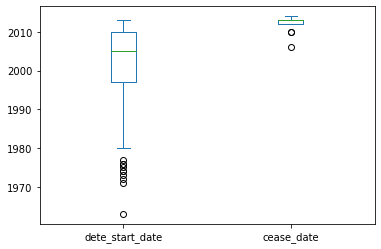

In [20]:
dete_resignations[['dete_start_date','cease_date']].plot(kind='box')

The start dates seems to all be earlier than resignation dates, which is reasonable.
Though there are several outliers in  both columns, we see no anomalies with the years data.

## Analyzing the length of working time

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The `tafe_resignations` dataframe already has a column, which we renamed to `instirtute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`

In [21]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [22]:
# create a new column 'institute_service' in dete_resignations
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

<AxesSubplot:>

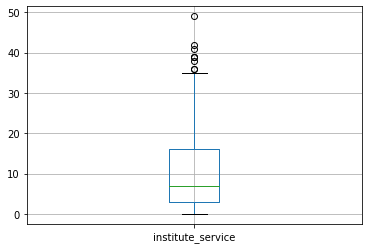

In [23]:
dete_resignations.boxplot(column='institute_service')

## Identify Dissatisfied Employees
After creating a new `institute_service` column. 
Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.  

1. tafe_resignations:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction  

2. dete_resignations:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload  

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied`.

Now, for the follow-up analysis ,we'll first convert the value in the columns above in dete_resignations to `True`, `False`, or `Nan` values.  
- `True`: indicates a person resigned because they were dissatisfied with the job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing  

Second, if each dataframe has any of the columns listed above containing a `True` value, we'll add a `True` value to the new column `dissatisfied`.

In [24]:
#inspecting two columns
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(ascending=True))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(ascending=True))

Contributing Factors. Dissatisfaction      55
-                                         277
Name: Contributing Factors. Dissatisfaction, dtype: int64
Job Dissatisfaction     62
-                      270
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [25]:
# write a function that makes the values convert to True, False, or Nan.
def update_vals(d):
    if pd.isnull(d):
        return np.nan
    elif d == '-':
        return False
    else:
        return True         

In [26]:
# convert the 'Contributing Factors. Dissatisfaction' and 
#'Contributing Factors. Job Dissatisfaction' columns
#in tafe_resignation dataframe into True, False, or Nan values.
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]=tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [27]:
# create "dissatisfied" column and add "True" value 
# If any of the columns listed above contain a True value
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                         'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [28]:
# create "dissatisfied" column and add "True" value 
# If any of the columns listed above contain a True value
dete_resignations['dissatisfied']=dete_resignations[['job_dissatisfaction',
                                                         'dissatisfaction_with_the_department',
                                                         'physical_work_environment', 
                                                         'lack_of_recognition', 
                                                         'lack_of_job_security',
                                                         'work_location',
                                                         'employment_conditions', 
                                                         'work_life_balance',
                                                         'workload']].any(axis=1, skipna=False)


In [29]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      99
Name: dissatisfied, dtype: int64

## Combine two dataset

On this step, our goal is to aggregate the data according to the `institute_service` column, and to inspect the relationship between the the leangth of working period and the reason of dissatisfation. 

For answering the initial question:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Below we will combine the datasets and drop all the columns that have less than 500 non-null values.

In [30]:
# add a column for easily distinfuishing
dete_resignations['institute']= 'DETE'
tafe_resignations['institute']= 'TAFE'

In [31]:
# Combine the dataframes
combined = pd.concat([dete_resignations, tafe_resignations],
                    axis=0, ignore_index=True)

In [32]:
combined.isnull().sum().sort_values(ascending=False)

torres_strait                                          651
south_sea                                              648
aboriginal                                             644
disability                                             643
nesb                                                   642
business_unit                                          619
classification                                         490
region                                                 386
role_start_date                                        380
dete_start_date                                        368
role_service                                           361
employment_conditions                                  340
none_of_the_above                                      340
work_life_balance                                      340
traumatic_incident                                     340
ill_health                                             340
study/travel                                           3

In [33]:
combined_updated = combined.dropna(axis=1, thresh= 500)
combined_updated.isnull().sum().sort_values(ascending=False)

institute_service    88
gender               59
age                  55
employment_status    54
position             53
cease_date           16
id                    0
separationtype        0
dissatisfied          0
institute             0
dtype: int64

## Convert  "institute_service" into different categories

To analyze the data, we'll convert these numbers into categories. 

We'll use the definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [34]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [35]:
# extract the years of service and convert the type to float
combined_updated['institute_service'] =combined_updated['institute_service'].astype(str).str.extract(r'(\d+)').astype(float)

combined_updated['institute_service'].value_counts()

/var/folders/16/gtjhrbvx7g336_chk8m2dz3m0000gn/T/ipykernel_5767/940302803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] =combined_updated['institute_service'].astype(str).str.extract(r'(\d+)').astype(float)


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service, dtype: int64

In [36]:
# Convert years of service to categories
def classify(y):
    if pd.isnull(y):
        return np.nan
    elif y < 3:
        return 'New'
    elif y < 6:
        return 'Experienced'
    elif y < 10:
        return 'Established'
    else:
        return 'Veteran'

In [37]:
combined_updated['service_cat'] =combined_updated['institute_service'].apply(classify)
combined_updated['service_cat'].value_counts()

/var/folders/16/gtjhrbvx7g336_chk8m2dz3m0000gn/T/ipykernel_5767/3870288494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] =combined_updated['institute_service'].apply(classify)


New            193
Experienced    155
Veteran        142
Established     73
Name: service_cat, dtype: int64

## Data Aggregation

Now, let's aggregate the `dissatisfied` column and calculate the number of people in New, Experienced, Veteran, and Established group, the percentage of people in each group.

In [38]:
# verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [39]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_piv=combined_updated.pivot_table(values='dissatisfied', index='service_cat')
dis_piv

,dissatisfied
service_cat,
Established,0.561644
Experienced,0.316129
New,0.295337
Veteran,0.471831


<AxesSubplot:xlabel='service_cat'>

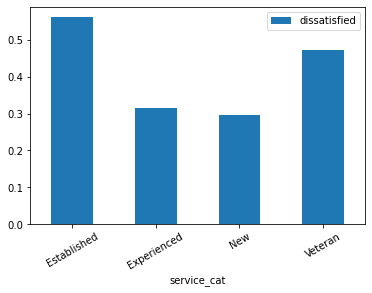

In [40]:
# plot the resluts
dis_piv.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that not only the employees who worked for the institute for a short period of time resigning due to some kind of dissatisfaction, but even those employees who worked for more than 7 years (Established and Veteran) also resigned for some kind of dissatisfaction.